In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(engine=engine, reflect=True)
print(Base.classes.keys())

['measurement', 'station']


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

measurement = Base.classes.measurement
measurement.__dict__.keys()


dict_keys(['__table__', '__module__', '__doc__', '_sa_class_manager', '__init__', 'id', 'station', 'date', 'prcp', 'tobs', '__mapper__'])

In [8]:
# Save references to each table

station = Base.classes.station
station.__dict__.keys()

dict_keys(['__table__', '__module__', '__doc__', '_sa_class_manager', '__init__', 'id', 'station', 'name', 'latitude', 'longitude', 'elevation', '__mapper__'])

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23')

Text(0.5, 0, 'Date')

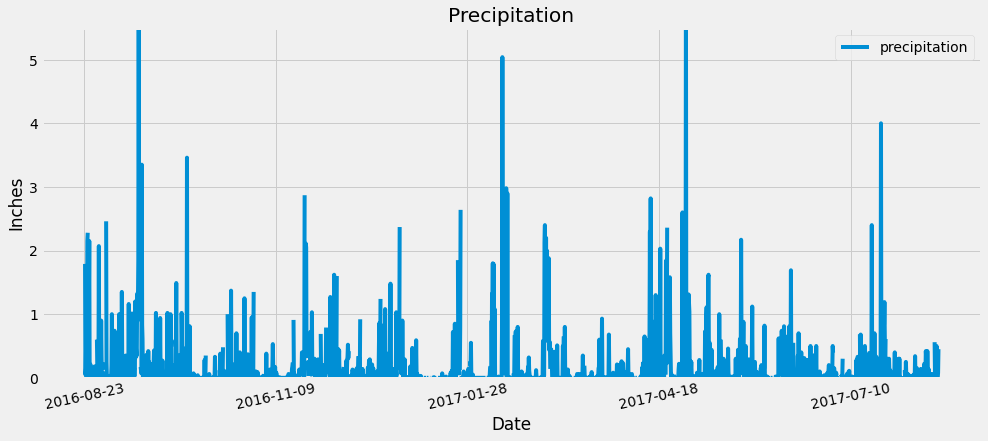

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.date(2017,8, 23)

# Calculate the date one year from the last date in data set.

last_year =  most_recent_date - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores

query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(query).rename(columns = {'prcp': 'precipitation'})
prcp_df = prcp_df.set_index('date')

# Sort the dataframe by date

prcp_df = prcp_df.sort_values(by = ["date"])

# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(title = 'Precipitation' , figsize = (15,6), rot = 12)
plt.legend(loc = 'upper right')
plt.ylim(0,5.5)
plt.ylabel('Inches')
plt.xlabel('Date')



In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()
prcp_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
session.query(station).count()


9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

stations = session.query(measurement.station,func.count(measurement.id)).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

lha = [measurement.station,func.min(measurement.tobs), func.max(measurement.tobs),func.avg(measurement.tobs)]

most_active_station= session.query(*lha).filter_by(station = "USC00519281").all()

most_active_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'Temperature Histogram')

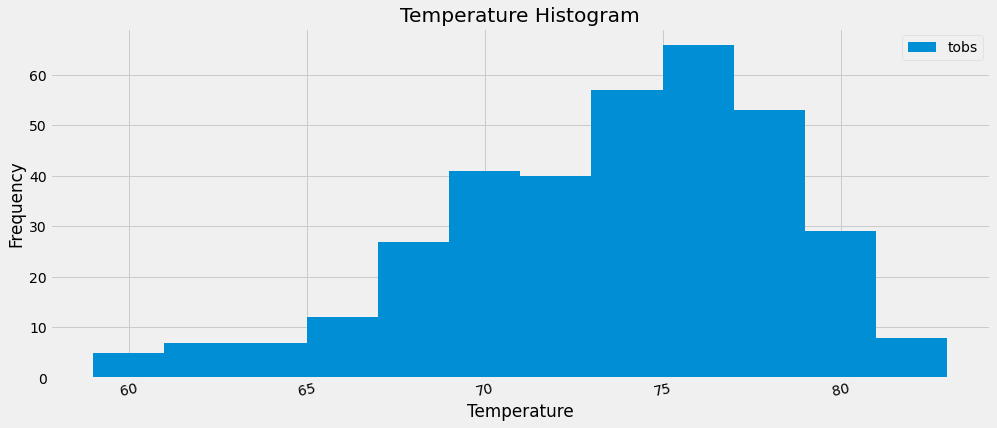

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

year = session.query(measurement.date, measurement.tobs).filter_by(station = "USC00519281").\
    filter(measurement.date >= last_year).all()

year = pd.DataFrame(year)

year.plot(kind = "hist", bins = 12, figsize = (15,6), rot = 12)
plt.xlabel('Temperature')
plt.title('Temperature Histogram')

# Close session

In [21]:
# Close Session
session.close()